In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py


In [2]:
df = pd.read_csv('2021VAERSSYMPTOMS.csv', encoding='utf8')
pd.set_option('display.max_columns', None)
df.head()

VAERS_ID               SYMPTOM1  SYMPTOMVERSION1  \
0    916710           Appendicitis             23.1   
1    916741                 Chills             23.1   
2    916741                Myalgia             23.1   
3    916742  Anaphylactic reaction             23.1   
4    916742         Intensive care             23.1   

                               SYMPTOM2  SYMPTOMVERSION2             SYMPTOM3  \
0  Band neutrophil percentage increased             23.1              Surgery   
1        Complex regional pain syndrome             23.1              Fatigue   
2                     Pain in extremity             23.1  Peripheral swelling   
3                            Blood test             23.1    Burning sensation   
4                              Pruritus             23.1                 Rash   

   SYMPTOMVERSION3                          SYMPTOM4  SYMPTOMVERSION4  \
0             23.1  White blood cell count increased             23.1   
1             23.1                          Headache             23.1   
2             23.1                    X-ray abnormal             23.1   
3             23.1    Central venous catheterisation             23.1   
4             23.1                      Rash macular             23.1   

                          SYMPTOM5  SYMPTOMVERSION5  
0                              NaN              NaN  
1  Joint range of motion decreased             23.1  
2                              NaN              NaN  
3                        Dysphonia             23.1  
4                 Throat tightness             23.1

In [3]:
df.isnull().sum()

VAERS_ID              0
SYMPTOM1              0
SYMPTOMVERSION1       0
SYMPTOM2            970
SYMPTOMVERSION2     970
SYMPTOM3           1631
SYMPTOMVERSION3    1631
SYMPTOM4           2155
SYMPTOMVERSION4    2155
SYMPTOM5           2561
SYMPTOMVERSION5    2561
dtype: int64

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:,:] = imputer.fit_transform(df)

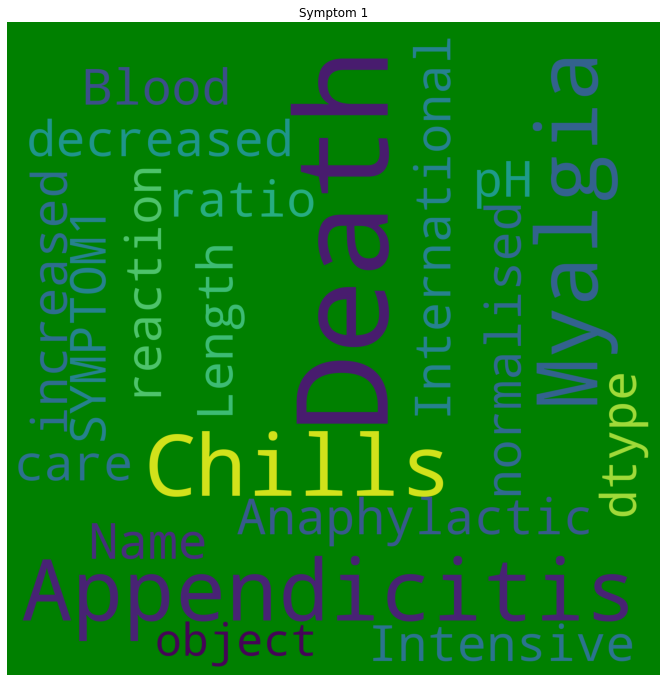

In [5]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'green',
                      height =2000,
                      width = 2000
                     ).generate(str(df["SYMPTOM1"]))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Symptom 1")
plt.show()

<Figure size 720x432 with 0 Axes>

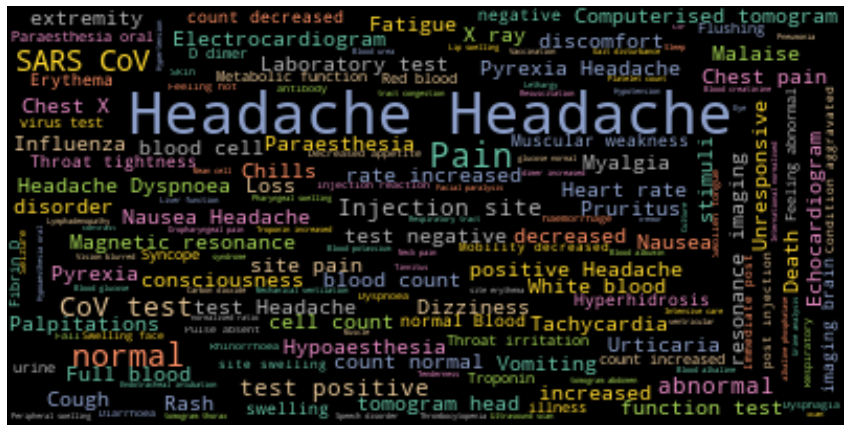

In [6]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.SYMPTOM4)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='Set2', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

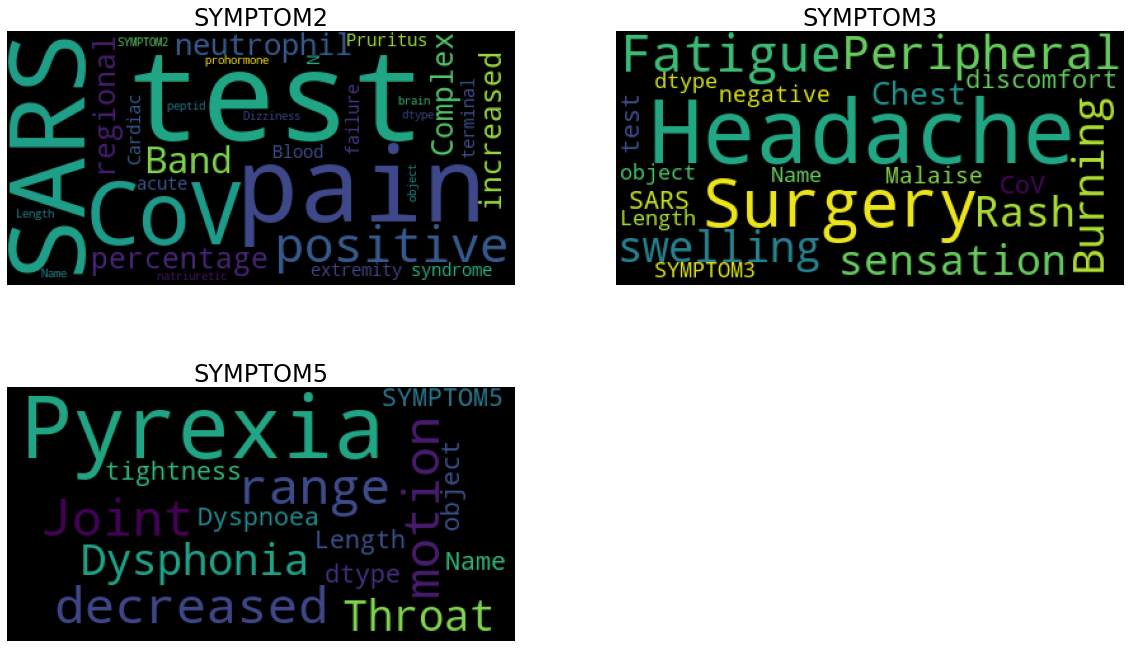

In [7]:
text_cols = ['SYMPTOM2', 'SYMPTOM3', 'SYMPTOM5']

from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords = set(list(STOPWORDS) + ['|']), random_state = 42)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(text_cols):
  op = wc.generate(str(df[c]))
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(c.upper(), fontsize=24)
  _ = axes[i].axis('off')

_ = fig.delaxes(axes[3])

In [8]:
fig = px.bar(df, 
             x='SYMPTOM1', y='SYMPTOMVERSION1', color_discrete_sequence=['#2B3A67'],
             title='Symptom 1', text='VAERS_ID')
fig.show()

In [9]:
! pip install -q dabl country_converter

In [10]:
import dabl
import warnings

Target looks like regression


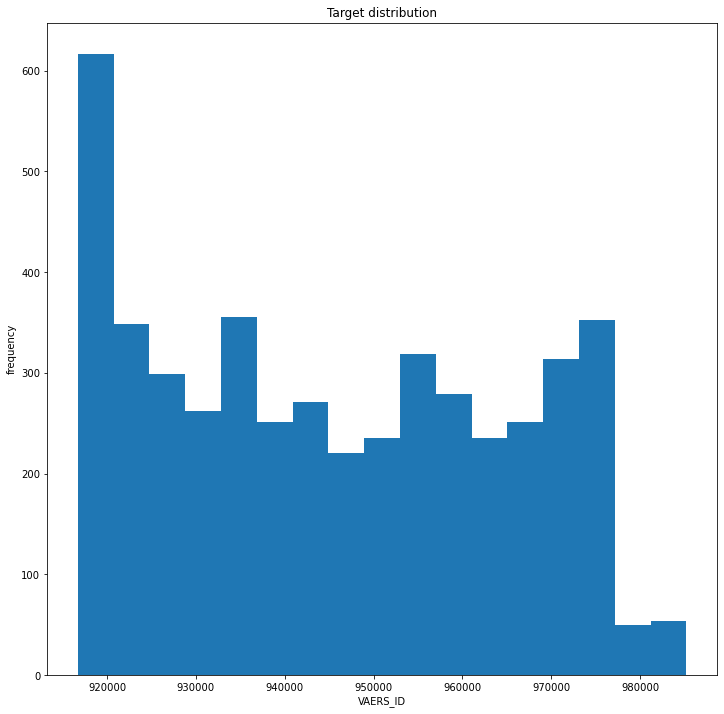

In [11]:
#plt.style.use('classic')
new_df = df[['VAERS_ID', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']]
dabl.plot(new_df, target_col='VAERS_ID')

In [12]:
df1 = pd.read_csv('2021VAERSVAX.csv', encoding='utf8')
pd.set_option('display.max_columns', None)
df1.head()

VAERS_ID VAX_TYPE         VAX_MANU  VAX_LOT VAX_DOSE_SERIES VAX_ROUTE  \
0    916710  COVID19          MODERNA      NaN               1        IM   
1    916741  COVID19  PFIZER\BIONTECH   EH9899               1       SYR   
2    916742  COVID19  PFIZER\BIONTECH      NaN               1        IM   
3    916746  COVID19          MODERNA  037K20A               1        IM   
4    916772  COVID19  PFIZER\BIONTECH   EJ1685             UNK        IM   

  VAX_SITE                             VAX_NAME  
0       LA          COVID19 (COVID19 (MODERNA))  
1       LA  COVID19 (COVID19 (PFIZER-BIONTECH))  
2      NaN  COVID19 (COVID19 (PFIZER-BIONTECH))  
3       LA          COVID19 (COVID19 (MODERNA))  
4       LA  COVID19 (COVID19 (PFIZER-BIONTECH))

In [13]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df1))
    g = sns.countplot(df1[feature], order = df1[feature].value_counts().index[:20], palette= ('#32a852', '#a84e32', '#3242a8'))
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

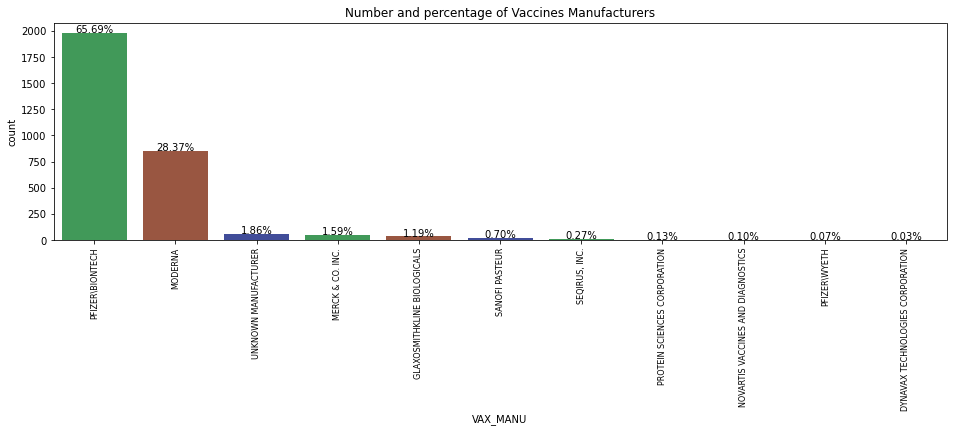

In [14]:
plot_count("VAX_MANU", "Vaccines Manufacturers", df1,4)

In [15]:
!pip install pywaffle

In [16]:
variable = df1["VAX_MANU"].value_counts()

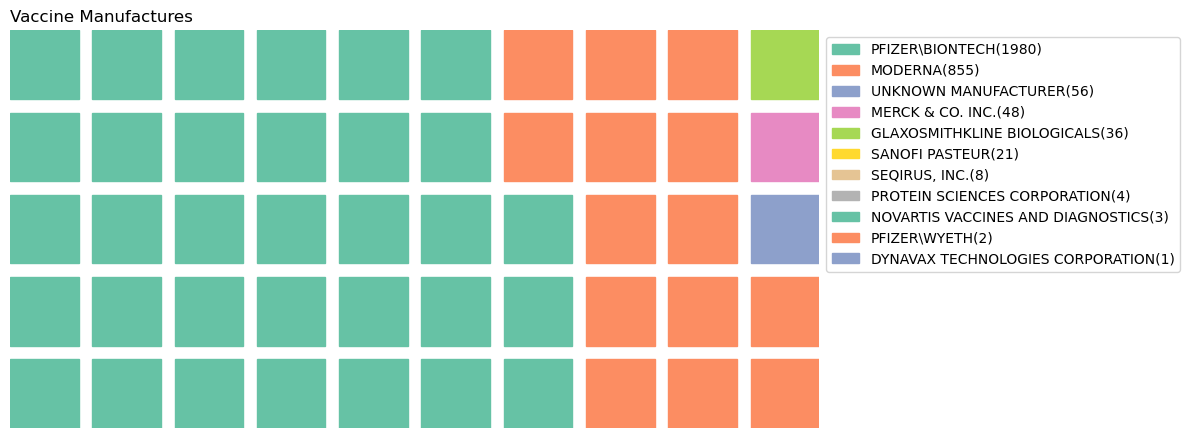

In [17]:
from pywaffle import Waffle

plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values=variable,
    title={'label': 'Vaccine Manufactures', 'loc': 'left'},
    labels=["{}({})".format(a, b) for a, b in zip(variable.index, variable) ],
    # Set the position of the legend
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    dpi=100
)
plt.show()

<Figure size 720x432 with 0 Axes>

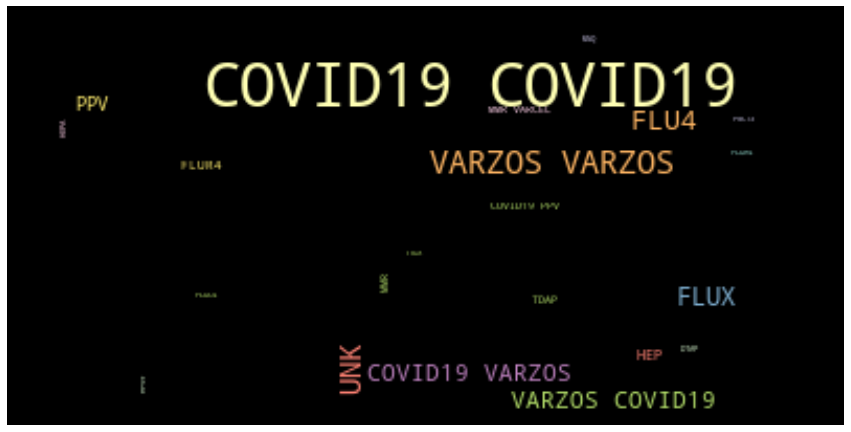

In [18]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df1.VAX_TYPE)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

In [19]:
patient = pd.read_csv('2021VAERSDATA.csv', encoding='windows-1254')

In [20]:
new_patient_data = patient.merge(df1, on="VAERS_ID")

In [21]:
new_patient_data['RECOVD'] = new_patient_data['RECOVD'].replace(np.nan, 'Unknown')
new_patient_data['RECOVD'] = new_patient_data['RECOVD'].replace('Y', 'Yes')
new_patient_data['RECOVD'] = new_patient_data['RECOVD'].replace('N', 'No')
new_patient_data['RECOVD'] = new_patient_data['RECOVD'].replace('U', 'Unknown')

In [22]:
fig = px.scatter(new_patient_data, x="AGE_YRS", y="VAERS_ID", color="SEX")
fig.update_layout(
    title_text='Age Distribution and Gender',
    xaxis_title_text='Age',
    yaxis_title_text='ID'
)
fig.show()

In [23]:
fig = px.scatter(new_patient_data, x="AGE_YRS", y="VAERS_ID", color="RECOVD")
fig.update_layout(
    title_text='Age Distribution and Recovery Status',
    xaxis_title_text='Age',
    yaxis_title_text='ID'
)
fig.show()

In [24]:
df1.head()

VAERS_ID VAX_TYPE         VAX_MANU  VAX_LOT VAX_DOSE_SERIES VAX_ROUTE  \
0    916710  COVID19          MODERNA      NaN               1        IM   
1    916741  COVID19  PFIZER\BIONTECH   EH9899               1       SYR   
2    916742  COVID19  PFIZER\BIONTECH      NaN               1        IM   
3    916746  COVID19          MODERNA  037K20A               1        IM   
4    916772  COVID19  PFIZER\BIONTECH   EJ1685             UNK        IM   

  VAX_SITE                             VAX_NAME  
0       LA          COVID19 (COVID19 (MODERNA))  
1       LA  COVID19 (COVID19 (PFIZER-BIONTECH))  
2      NaN  COVID19 (COVID19 (PFIZER-BIONTECH))  
3       LA          COVID19 (COVID19 (MODERNA))  
4       LA  COVID19 (COVID19 (PFIZER-BIONTECH))

In [25]:
r = new_patient_data['VAX_ROUTE'].value_counts()
route = pd.DataFrame({'Route':r.keys(), 'Count': r.values})
route_fig = px.pie(route, values="Count", names="Route", title="Vaccination Route to Human Body")
route_fig.update_layout(
    title_text='Vaccination Route to Human Body',
    xaxis_title_text='Route', 
    yaxis_title_text='Count',
)
route_fig.show()

In [26]:
df.head()

VAERS_ID               SYMPTOM1  SYMPTOMVERSION1  \
0    916710           Appendicitis             23.1   
1    916741                 Chills             23.1   
2    916741                Myalgia             23.1   
3    916742  Anaphylactic reaction             23.1   
4    916742         Intensive care             23.1   

                               SYMPTOM2  SYMPTOMVERSION2             SYMPTOM3  \
0  Band neutrophil percentage increased             23.1              Surgery   
1        Complex regional pain syndrome             23.1              Fatigue   
2                     Pain in extremity             23.1  Peripheral swelling   
3                            Blood test             23.1    Burning sensation   
4                              Pruritus             23.1                 Rash   

   SYMPTOMVERSION3                          SYMPTOM4  SYMPTOMVERSION4  \
0             23.1  White blood cell count increased             23.1   
1             23.1                          Headache             23.1   
2             23.1                    X-ray abnormal             23.1   
3             23.1    Central venous catheterisation             23.1   
4             23.1                      Rash macular             23.1   

                          SYMPTOM5  SYMPTOMVERSION5  
0                          Pyrexia             23.1  
1  Joint range of motion decreased             23.1  
2                          Pyrexia             23.1  
3                        Dysphonia             23.1  
4                 Throat tightness             23.1

In [27]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

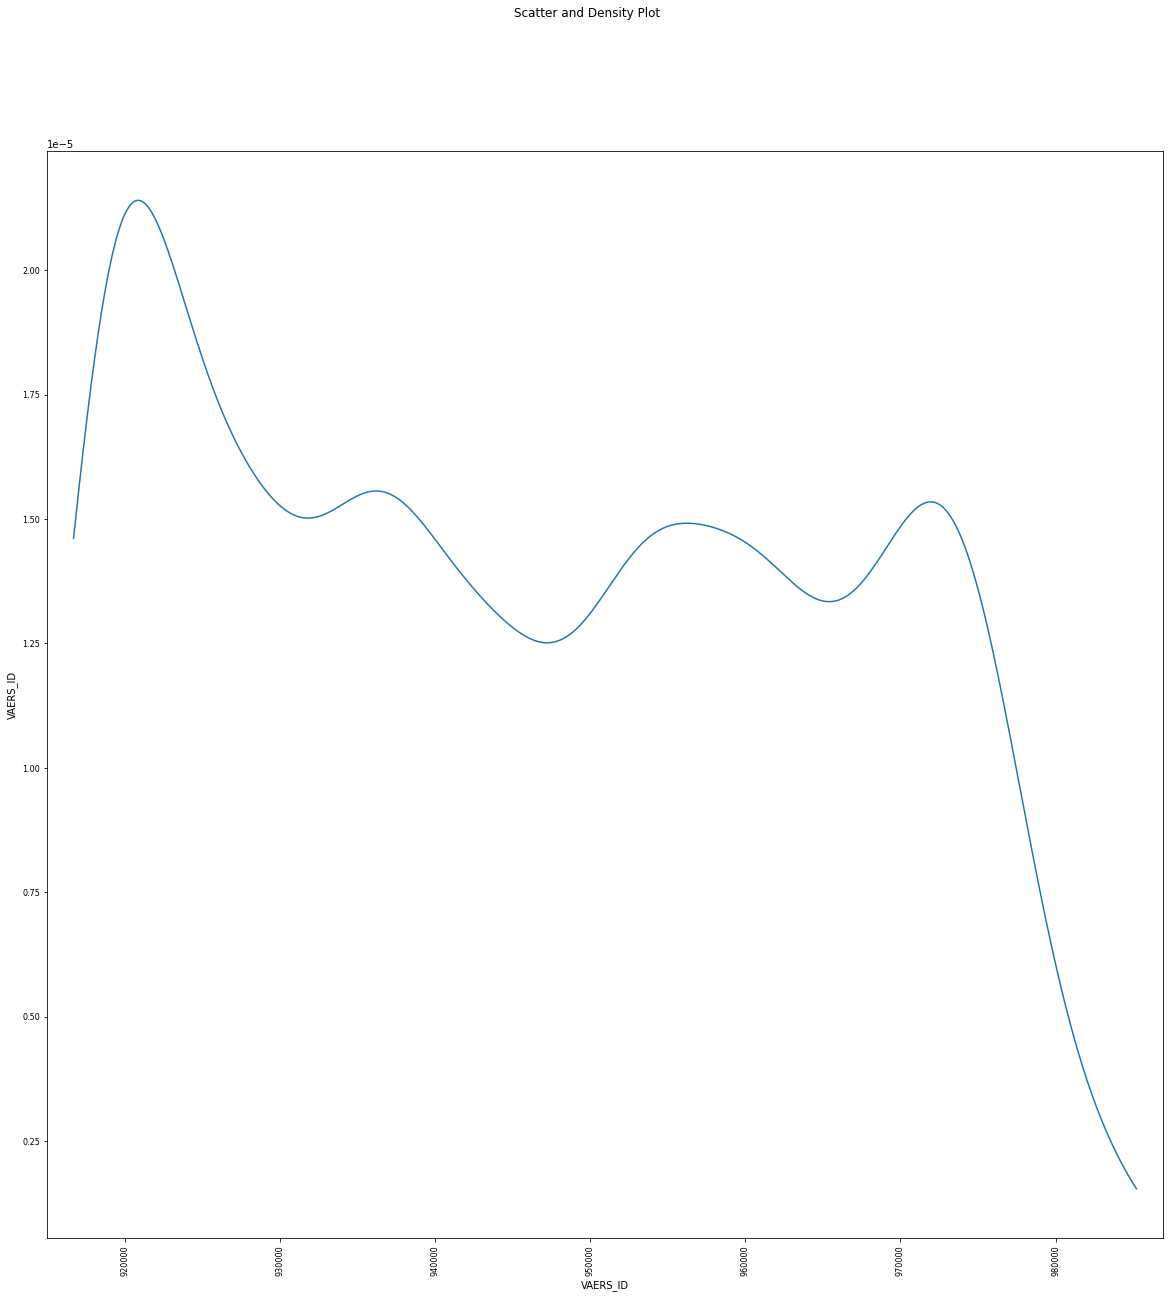

In [28]:
plotScatterMatrix(df, 20, 20)